In [ ]:
#Mount Drive from Google
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ModuleNotFoundError:
    pass
else:
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Load the data
filepath = '/content/drive/Othercomputers/My Laptop/data-science-assignments/07 - Logistic Regression Regularization/'
filename = 'Wine_cultivars.csv'
filepathname = filepath + filename

In [ ]:
df = pd.read_csv(filepathname, header=0)

In [ ]:
y = df['Class label']
X = df.drop(columns=['Class label'])

In [ ]:
df['Class label'].value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: Class label, dtype: float64

In [ ]:
df.info()
df.head()

In [ ]:
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [ ]:
def calculate_model(X_train, X_test, y_train, y_test, reg_type, my_title="No Title", gen_cm=False, my_color = 'Blues',normVal=None):
    
    #Create a pipeline with a StandardScaler and a KNeighborsClassifier
    #Create another pipeline with StandardScaler and DummyClassifier
    #using the 'most_frequent' strategy
    num_selector = make_column_selector(dtype_include="number")
    scaler = StandardScaler()
    scaler_tuple = (scaler, num_selector)
    #Fit both model pipelines and save their predictions test sets

    #Instantiating the column transformer
    column_transformer = make_column_transformer(scaler_tuple)

    my_dict = dict()

    pipe = make_pipeline(column_transformer, reg_type)
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    my_dict['score'] = score
    if gen_cm == True:
        predictions = pipe.predict(X_test)
        my_dict['my_cm'] = metrics.confusion_matrix(y_test, predictions)
        my_dict['my_class_report'] = metrics.classification_report(y_test, predictions,zero_division=1)
        
        my_dict['my_cm_ravel'] = my_dict['my_cm'].ravel()
        disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = my_color,normalize=normVal);
        disp.ax_.set_title(my_title)
        plt.show()
    return my_dict

In [ ]:
def calculate_optimalN(X_train, X_test, y_train, y_test):
    max_knn_score = 0
    counter = 1
    for n in range(1,110):
        my_classifier = KNeighborsClassifier(n_neighbors=n)
        temp = calculate_model(X_train, X_test, y_train, y_test, my_classifier)
        if temp['score'] > max_knn_score:
            max_knn_score = temp['score']
            max_knn_counter = counter + 1
        counter += 1
    return max_knn_counter
    

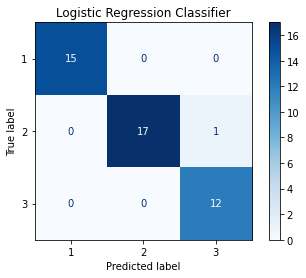

Logistic Regression Classifier Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



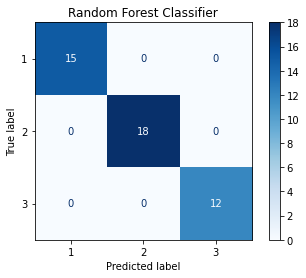

Random Forest Classifier Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



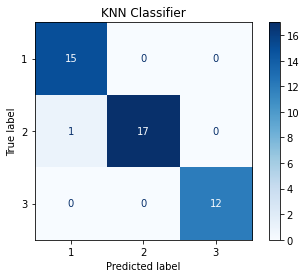

KNN Classifier Classification Report
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#Setting number to use for random state
rs_num = 42
cLogReg = 100 #used by logistic regression

#Splitting X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs_num)

my_classifier = LogisticRegression(C=cLogReg)
m_title = 'Logistic Regression Classifier'
lg_mets = calculate_model(X_train, X_test, y_train, y_test, my_classifier, m_title, True)
print("{} Classification Report\n {}".format(m_title,lg_mets['my_class_report']))

my_classifier = RandomForestClassifier()
m_title = 'Random Forest Classifier'
rf_mets = calculate_model(X_train, X_test, y_train, y_test, my_classifier, m_title, True)
print("{} Classification Report\n {}".format(m_title,rf_mets['my_class_report']))

n = calculate_optimalN(X_train, X_test, y_train, y_test)
m_title = 'KNN Classifier'
my_classifier = KNeighborsClassifier(n_neighbors = n)
kn_mets = calculate_model(X_train, X_test, y_train, y_test, my_classifier, m_title, True)
print("{} Classification Report\n {}".format(m_title,kn_mets['my_class_report']))

##Logistic Regression and Random Forest have very similar performance.
1. Sensitivity analysis on random state and C, appeared to show Random Forest having higher accuracy.
2. The decision on which to select would require further iteration to see which model irked out another percent or few of accuracy.